In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper
from src import picture_grid

In [2]:
width = 9.5
height = 9.5
plt.rcParams['figure.figsize'] = [width, height]

In [3]:
size = 200

In [4]:
use_c_implementation = True

### Statischer Gaussian

In [5]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5
gaussian_static = [x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0], [0, variance_y]], size]

In [6]:
colorschemes = color_schemes.get_colorbrewer_schemes()
backgroundcolorscheme = color_schemes.get_background_colorbrewer_scheme()

In [7]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

var_x, var_y = [2,5,10,15,20], [15,20]
gaussians_2d = []
for i,mu_y in enumerate([-2,-1,-0.5,0.5,1,2]):
    for j,mu_x in enumerate([-2,-1,-0.5,0.5,1,2]):
        gaussians_2d.append([x_min, x_max, y_min, y_max, [mu_x,mu_y], [[variance_x, 0], [0, variance_y]], size])

In [8]:
gaussians_2 = []
for i in range(len(gaussians_2d)):
    gaussians_2.append([gaussian_static, gaussians_2d[i]])

In [9]:
images_2 = []
z_sums = []
for i in range(len(gaussians_2)):
    z_list, image, z_sum = picture_worker.generate_image(gaussians_2[i], colorschemes, use_c_implementation=use_c_implementation)
    images_2.append(image)
    z_sums.append(z_sum)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


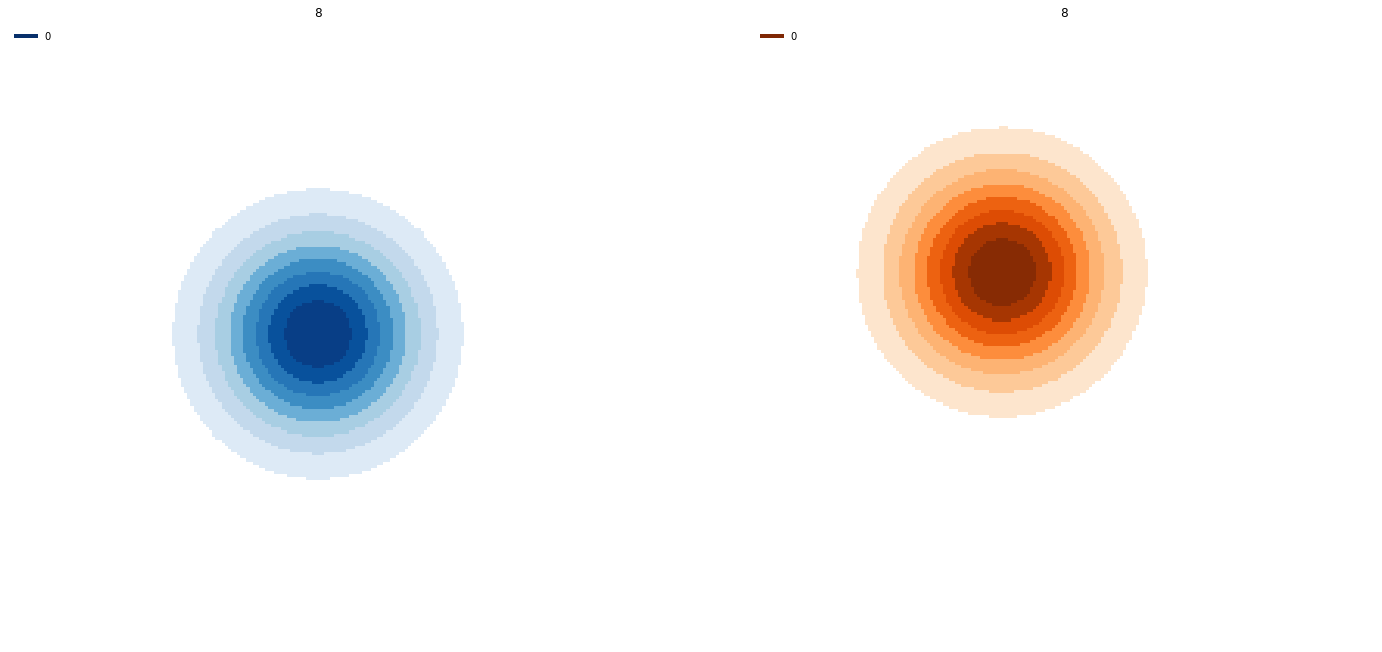

In [10]:
picture_grid.plot_image(gaussians=gaussians_2[0], colorschemes=colorschemes)

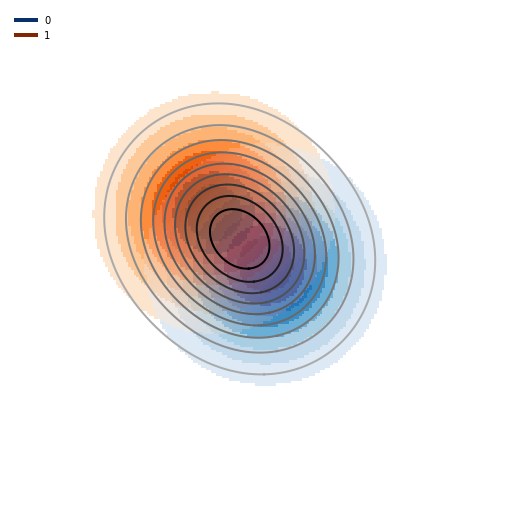

In [11]:
picture_worker.plot_image(plt, images_2[0], gaussians_2[0], z_sums[0], color_operations.get_colorcodes(colorschemes))